# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

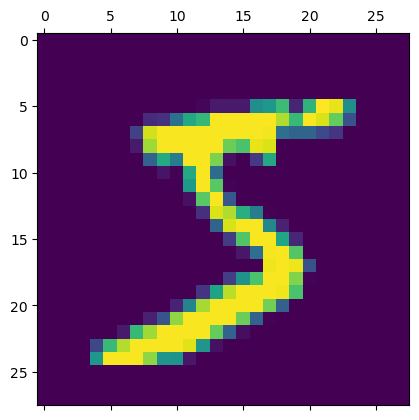

In [5]:
#to see how first image looks
plt.matshow(x_train[0])

In [6]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [9]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [10]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 1ms/step - loss: 0.6532 - accuracy: 0.8377 - val_loss: 0.3513 - val_accuracy: 0.9048
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3344 - accuracy: 0.9075 - val_loss: 0.2883 - val_accuracy: 0.9204
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2874 - accuracy: 0.9188 - val_loss: 0.2575 - val_accuracy: 0.9292
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2575 - accuracy: 0.9280 - val_loss: 0.2377 - val_accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2350 - accuracy: 0.9341 - val_loss: 0.2213 - val_accuracy: 0.9394
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2167 - accuracy: 0.9398 - val_loss: 0.2021 - val_accuracy: 0.9438
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2009 - accuracy: 0.9441 - val_loss: 0.1910 - val_accuracy:

# Evaluate the Model

In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9540
Loss = 0.163
Accuracy = 0.954


# Making Prediction on New Data

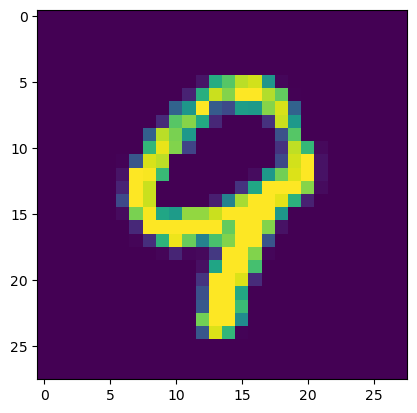

In [12]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [13]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 0s 1ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 969    0    1    1    0    3    3    2    1    0]
 [   0 1114    3    2    1    1    3    2    9    0]
 [   7    1  977   10    3    2    7    7   15    3]
 [   0    1    5  970    0    9    0    9   10    6]
 [   1    0    6    0  927    0   10    3    3   32]
 [  10    1    0   24    3  827    9    1   10    7]
 [  10    3    3    1    8    9  919    1    4    0]
 [   1    9   16    5    3    1    0  968    2   23]
 [   4    2    4   14    4    8    9    7  918    4]
 [  10    6    1   13   18    2    1    6    1  951]], shape=(10, 10), dtype=int32)


In [4]:
history.history.keys()

NameError: name 'history' is not defined

In [5]:
plt.plot(history,history['accueacy'])
plt.plot(history,history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
history.history.keys()

In [6]:
plt.plot(history,history['loss'])
plt.plot(history,history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

NameError: name 'history' is not defined